In [208]:
import pandas as pd
import numpy as np
df =pd.read_csv('datasets\employee_data (1) 2 - employee_data (1) 2.csv')

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
C:\Users\kelvi\AppData\Local\Temp\ipykernel_19512\1056288456.py:3: SyntaxWarning: invalid escape sequence '\e'


In [209]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [210]:
df['recently_promoted'] = df['recently_promoted'].fillna(0)

In [211]:
# df['last_evaluation'].describe()

In [212]:
df['filed_complaint'] = df['filed_complaint'].fillna(0)
df['last_evaluation'] = df['last_evaluation'].fillna(0.718477)
df = df.dropna()

In [213]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['department','salary','status']:
    df[i] = le.fit_transform(df[i])

In [214]:
df.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure'],
      dtype='object')

In [215]:
x = pd.DataFrame(df,columns=['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 
       'tenure'])

In [216]:
y = pd.DataFrame(df,columns=['status'])

In [217]:
from sklearn.preprocessing import StandardScaler
sl = StandardScaler()
for i in ['n_projects','tenure','avg_monthly_hrs']:
    x[i] = sl.fit_transform(x[[i]])

In [218]:
x['last_evaluation'].describe()
x['last_evaluation'].dropna()

0        0.932868
1        0.718477
2        0.788830
3        0.575688
4        0.845217
           ...   
14243    0.815504
14244    0.735865
14245    0.638604
14246    0.847623
14247    0.757184
Name: last_evaluation, Length: 13359, dtype: float64

In [219]:
# x.fillna(x.median)

In [220]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [221]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth=9)
model = decision_tree.fit(x_train,y_train)


In [222]:
# x_train = x_train.drop(columns=['last_evaluation'])
# x_test = x_test.drop(columns=['last_evaluation'])

In [223]:

train_accuracy = model.predict(x_train)
test_accuracy = model.predict(x_test)

test = accuracy_score(y_test,test_accuracy)
train =accuracy_score(y_train,train_accuracy)

print("Training accuracy: ", train)
print("Testing accuracy:",test)


Training accuracy:  0.9839992514269673


Testing accuracy: 0.9708083832335329


In [224]:
# decision_tree = tree.DecisionTreeClassifier(max_depth=9,max_leaf_nodes=100)
# model = decision_tree.fit(x_train,y_train)
# train_value_change_in_depth = model.predict(x_train)
# test_value_change_in_depth = model.predict(x_test)

# new_depth_test = accuracy_score(y_test,test_value_change_in_depth)
# new_depth_train =accuracy_score(y_train,train_value_change_in_depth)
# print("accuracy: ", new_depth_train)
# print("accuracy:",new_depth_test)

In [225]:
p_test = precision_score(y_test,test_accuracy)
p_train =precision_score(y_train,train_accuracy)

In [226]:
print("Training precision: ", p_train)
print("Testing precision:",p_test)

Training precision:  0.9867549668874173
Testing precision: 0.9361370716510904


In [227]:
c_test = confusion_matrix(y_test,test_accuracy,labels=[0,1])
c_train =confusion_matrix(y_train,train_accuracy,labels=[0,1])
print("Training confusion matrix: ", c_train)
print("Testing confusion matrix:",c_test)

Training confusion matrix:  [[8132   32]
 [ 139 2384]]
Testing confusion matrix: [[1993   41]
 [  37  601]]


In [228]:
from sklearn.metrics import f1_score

In [229]:
f_test = f1_score(y_test,test_accuracy)
f_train =f1_score(y_train,train_accuracy)
print("Training f1score: ", f_train)
print("Testing f1score:",f_test)

Training f1score:  0.9653776068029966
Testing f1score: 0.9390625


In [230]:
y.head()

,status
0,1
1,0
2,0
3,0
4,0


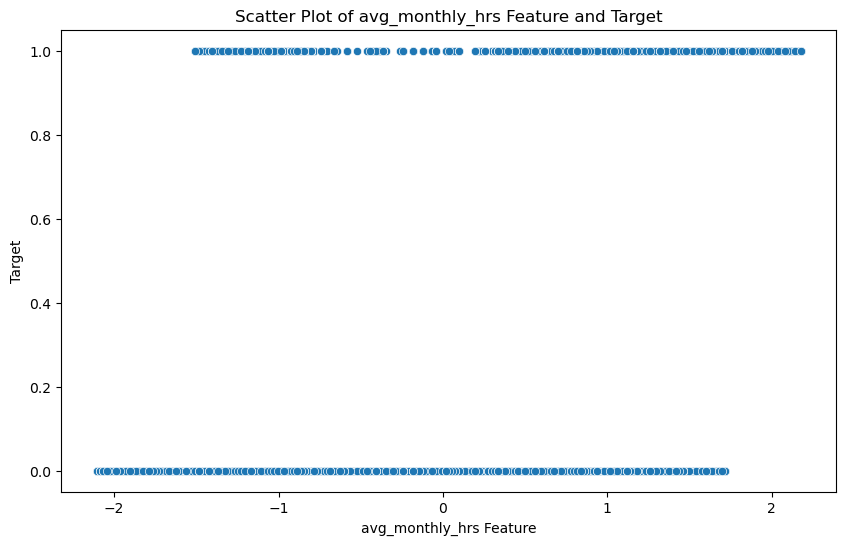

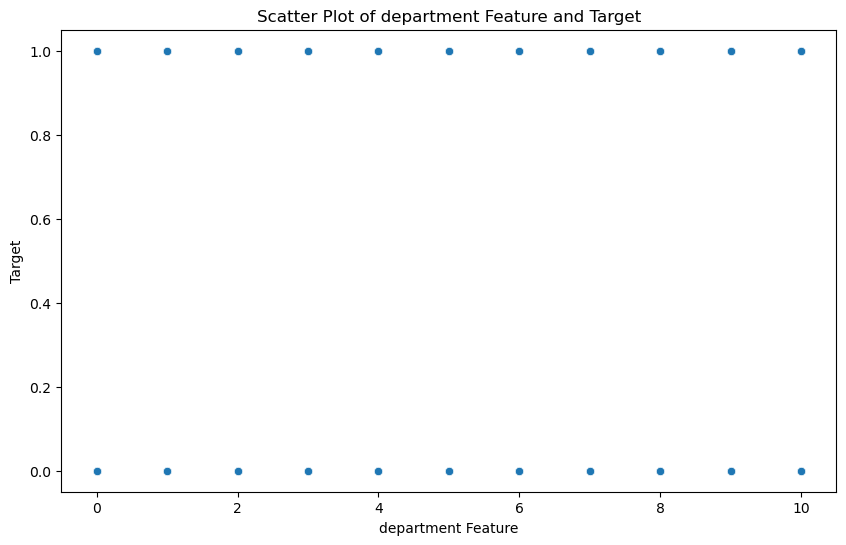

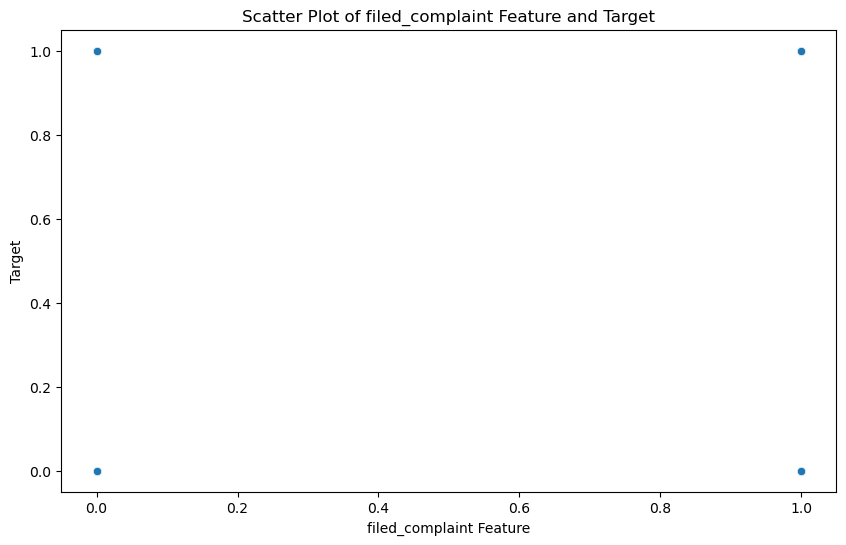

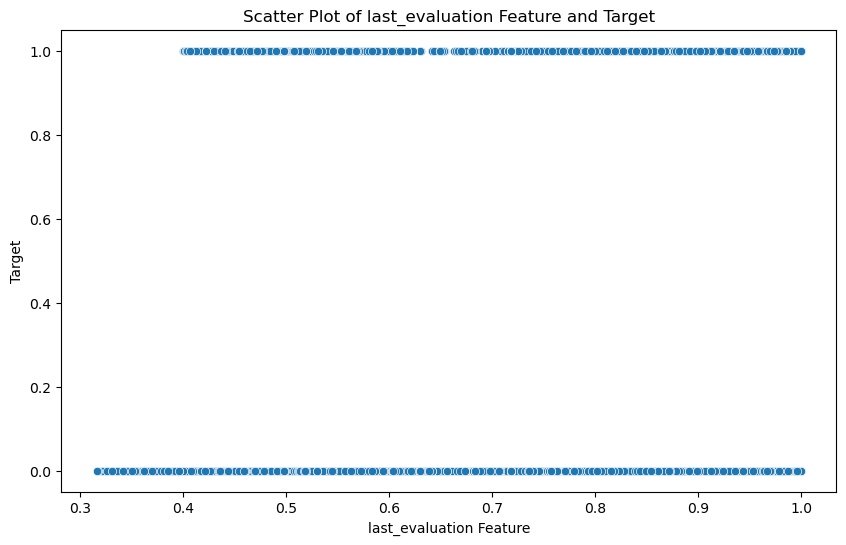

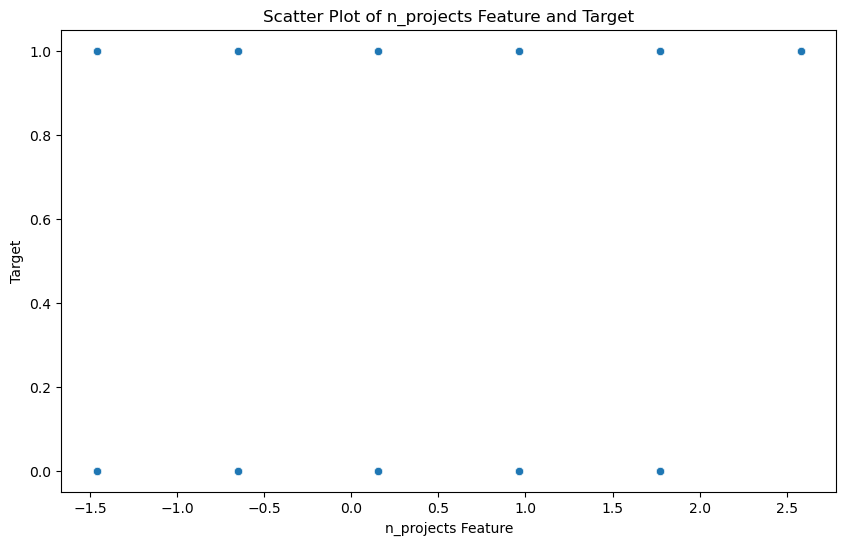

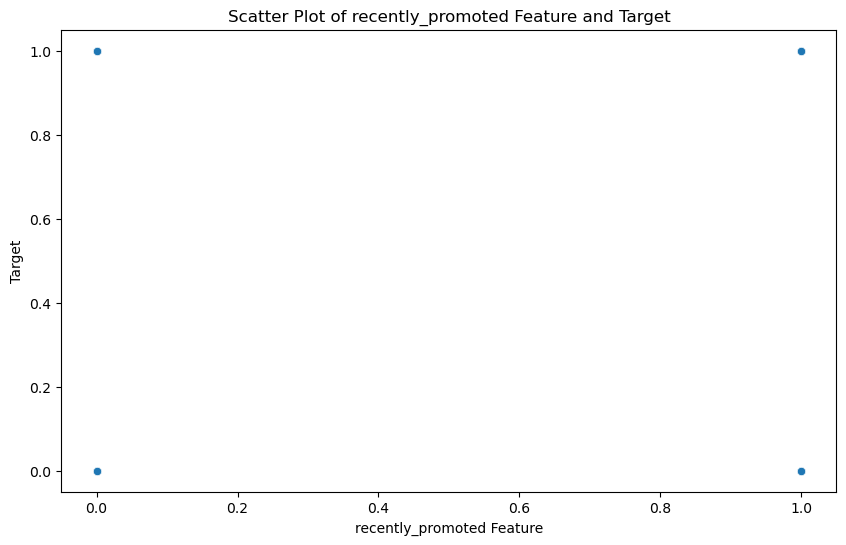

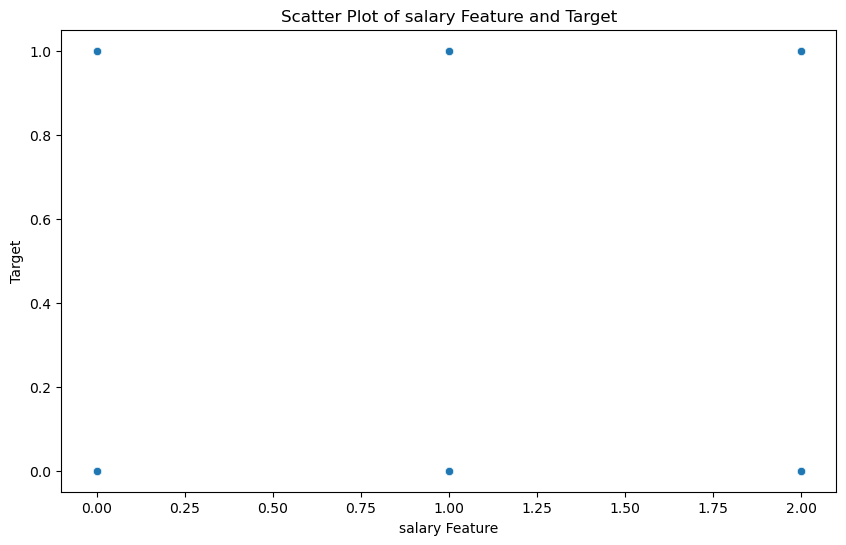

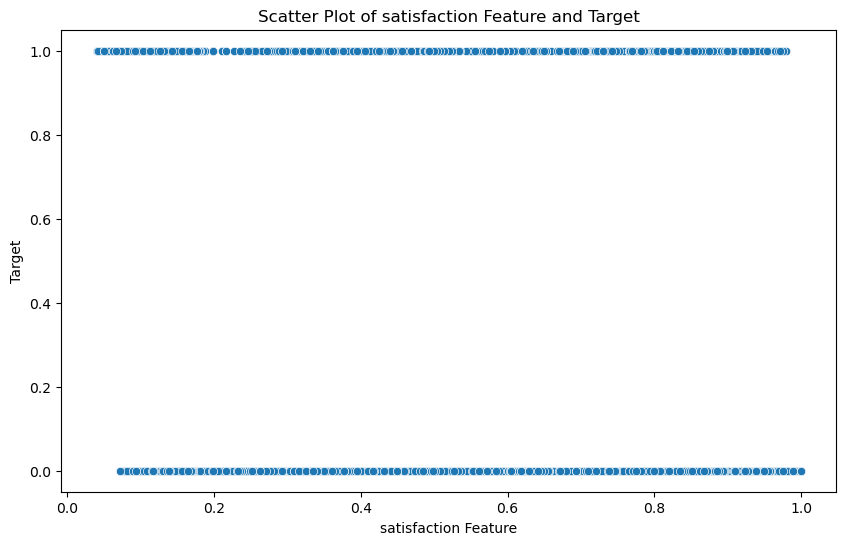

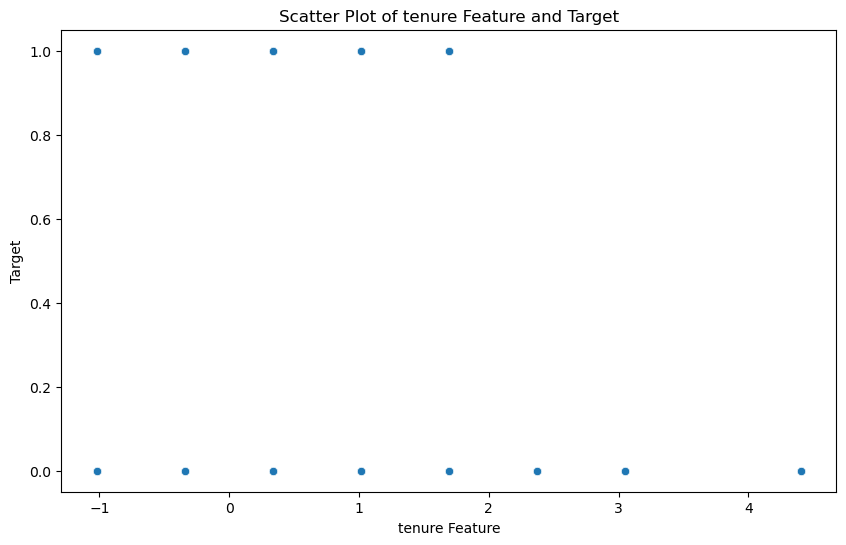

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in x.columns:
    plt.figure(figsize=(10, 6))  
    sns.scatterplot(x=x[i], y=y['status']) 
    plt.title(f'Scatter Plot of {i} Feature and Target')
    plt.xlabel(f'{i} Feature')
    plt.ylabel('Target')
    plt.show()

In [232]:
import graphviz

class_names = [str(cls) for cls in y['status'].unique()]

data = tree.export_graphviz(
    model,
    out_file=None,  # We want the output as a string to visualize immediately
    feature_names=x_train.columns,  # Use the correct feature names
    class_names=class_names,  # Pass unique class names
    filled=True,  # Color the nodes based on class prediction
    rounded=True,  # Rounded corners for better visuals
    special_characters=True  # To avoid errors if special characters are in feature names
)

# Create a graph from the exported DOT data
graph = graphviz.Source(data)

# Render the graph and save it to a file
graph.render("DesTree")

graph.view()



'DesTree.pdf'